# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#print(url + "appid="+weather_api_key + "&units=" + units + "&q=" + "Dallas")
test_response = requests.get(url + "appid=" + weather_api_key + "&units=" + units + "&q=" + "Dallas").json()
print(json.dumps(test_response, indent=4, sort_keys=True))



In [ ]:
print(f"check{weather_api_key}") 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_dict = []
cloud = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_spd = []

print("Beginning Data Retrieval")
print("---------------------------")

for city in cities:
    try:
        city_response = requests.get(url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units).json()
        cloud_city = city_response["clouds"]["all"]
        country_city = city_response["sys"]["country"]
        date_city = city_response["dt"]
        humidity_city = city_response["main"]["humidity"]
        lat_city = city_response["coord"]["lat"]
        lon_city = city_response["coord"]["lon"]
        max_city = city_response["main"]["temp_max"]
        wind_city = city_response["wind"]["speed"]
        print(f"Processing record {cities.index(city)+1} of Set 1 | {city}")
        city_dict.append(city)
        cloud.append(cloud_city)
        country.append(country_city)
        date.append(date_city)
        humidity.append(humidity_city)
        lat.append(lat_city)
        lon.append(lon_city)
        max_temp.append(max_city)
        wind_spd.append(wind_city)
        time.sleep(1)
    except KeyError:
        print(f"{city} has incomplete data, removing city")

Beginning Data Retrieval
---------------------------
Processing record 1 of Set 1 | bluff
Processing record 2 of Set 1 | dikson
Processing record 3 of Set 1 | rikitea
Processing record 4 of Set 1 | ewa beach
Processing record 5 of Set 1 | emerald
Processing record 6 of Set 1 | punta arenas
Processing record 7 of Set 1 | thompson
Processing record 8 of Set 1 | arkhangelsk
Processing record 9 of Set 1 | dingle
Processing record 10 of Set 1 | qaanaaq
Processing record 11 of Set 1 | albany
Processing record 12 of Set 1 | new norfolk
Processing record 13 of Set 1 | mataura
Processing record 14 of Set 1 | kruisfontein
Processing record 15 of Set 1 | samarai
Processing record 16 of Set 1 | aneho
Processing record 17 of Set 1 | gladstone
Processing record 18 of Set 1 | karratha
Processing record 19 of Set 1 | lebu
Processing record 20 of Set 1 | bluefields
Processing record 21 of Set 1 | constitucion
Processing record 22 of Set 1 | fairbanks
Processing record 23 of Set 1 | jamestown
Processing

Processing record 198 of Set 1 | redmond
Processing record 199 of Set 1 | yashkul
Processing record 200 of Set 1 | zyryanka
Processing record 201 of Set 1 | lompoc
Processing record 202 of Set 1 | hearst
Processing record 203 of Set 1 | oum hadjer
Processing record 204 of Set 1 | palaiokomi
Processing record 205 of Set 1 | fare
Processing record 206 of Set 1 | ben tre
Processing record 207 of Set 1 | tzucacab
Processing record 208 of Set 1 | kyrylivka
Processing record 209 of Set 1 | nouadhibou
Processing record 210 of Set 1 | sao filipe
Processing record 211 of Set 1 | amapa
Processing record 212 of Set 1 | namatanai
Processing record 213 of Set 1 | yar-sale
Processing record 214 of Set 1 | the valley
Processing record 215 of Set 1 | carnarvon
Processing record 216 of Set 1 | opochka
Processing record 217 of Set 1 | sarakhs
Processing record 218 of Set 1 | anamur
Processing record 219 of Set 1 | san quintin
Processing record 220 of Set 1 | coihaique
Processing record 221 of Set 1 | an

Processing record 397 of Set 1 | broken arrow
Processing record 398 of Set 1 | mount darwin
Processing record 399 of Set 1 | abnub
Processing record 400 of Set 1 | broome
Processing record 401 of Set 1 | ngunguru
Processing record 402 of Set 1 | cururupu
Processing record 403 of Set 1 | college
Processing record 404 of Set 1 | taltal
Processing record 405 of Set 1 | auki
Processing record 406 of Set 1 | orlik
Processing record 407 of Set 1 | lerwick
Processing record 408 of Set 1 | bulaevo
Processing record 409 of Set 1 | puerto escondido
Processing record 410 of Set 1 | ginda
Processing record 411 of Set 1 | brainerd
Processing record 412 of Set 1 | pangody
Processing record 413 of Set 1 | brookings
Processing record 414 of Set 1 | souillac
Processing record 415 of Set 1 | golkoy
Processing record 416 of Set 1 | nikel
Processing record 417 of Set 1 | jalu
Processing record 418 of Set 1 | honningsvag
Processing record 419 of Set 1 | itoman
Processing record 420 of Set 1 | port moresby


In [45]:
print("Cities",len(city_dict))
print("Countries",len(country))
print("Date", len(date))
print("Lat",len(lat))


Cities 548
Countries 548
Date 548
Lat 548


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
city_convert = {"City":city_dict,
               "Cloudiness": cloud,
               "Country": country,
               "Date": date,
               "Humidity": humidity,
               "Lat": lat,
               "Lng":lon,
               "Max Temp":max_temp,
               "Wind Speed": wind_spd}
city_df = pd.DataFrame(city_convert)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bluff,0,AU,1569382354,33,-23.58,149.07,82.43,11.16
1,dikson,100,RU,1569382354,89,73.51,80.55,36.35,15.64
2,rikitea,0,PF,1569382354,65,-23.12,-134.97,71.09,3.18
3,ewa beach,40,US,1569382354,58,21.32,-158.01,86.00,10.29
4,emerald,40,AU,1569382354,37,-23.53,148.16,84.00,10.29


In [49]:
city_df.to_csv(output_data_file,index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Observations:
Max Temps are highest in the -20 to +20 Latitude range and trend lower as we move futher North and South


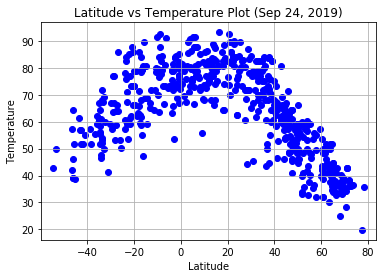

In [116]:
#figure
fig, ax1 = plt.subplots()
#fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature')
ax1.set_title('Latitude vs Temperature Plot (Sep 24, 2019)')
ax1.set_xlim(city_df["Lat"].min()-5,city_df["Lat"].max()+5 )
ax1.grid()

#plot

plt.scatter(city_df["Lat"], city_df["Max Temp"], c = "blue")
plt.savefig("output_data/lat_temp.png")

print("Observations:")
print("Max Temps are highest in the -20 to +20 Latitude range and trend lower as we move futher North and South")

#### Latitude vs. Humidity Plot

Observations:
No trend between Latitude and Humidity


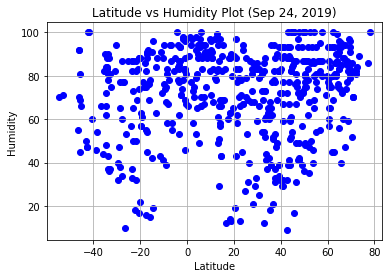

In [117]:
#figure
fig, ax1 = plt.subplots()
#fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Humidity')
ax1.set_title('Latitude vs Humidity Plot (Sep 24, 2019)')
ax1.set_xlim(city_df["Lat"].min()-5,city_df["Lat"].max()+5 )
ax1.grid()

#plot

plt.scatter(city_df["Lat"], city_df["Humidity"], c = "blue")
plt.savefig("output_data/lat_hum.png")

print("Observations:")
print("No trend between Latitude and Humidity")

#### Latitude vs. Cloudiness Plot

Observations:
No trend between Latitude and Cloudiness


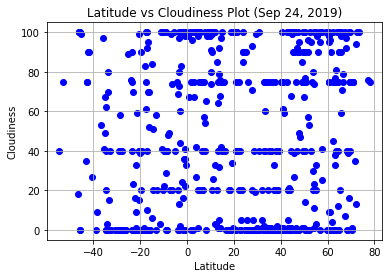

In [118]:
#figure
fig, ax1 = plt.subplots()
#fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Cloudiness')
ax1.set_title('Latitude vs Cloudiness Plot (Sep 24, 2019)')
ax1.set_xlim(city_df["Lat"].min()-5,city_df["Lat"].max()+5 )
ax1.grid()

#plot

plt.scatter(city_df["Lat"], city_df["Cloudiness"], c = "blue")
plt.savefig("output_data/lat_cloud.png")

print("Observations:")
print("No trend between Latitude and Cloudiness")

#### Latitude vs. Wind Speed Plot

Observations:
No trend between Latitude and Wind Speed


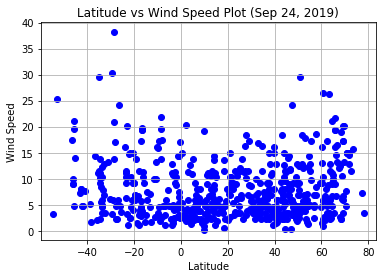

In [119]:
#figure
fig, ax1 = plt.subplots()
#fig.set_size_inches(13, 10)

#labels
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Wind Speed')
ax1.set_title('Latitude vs Wind Speed Plot (Sep 24, 2019)')
ax1.set_xlim(city_df["Lat"].min()-5,city_df["Lat"].max()+5 )
ax1.grid()

#plot

plt.scatter(city_df["Lat"], city_df["Wind Speed"], c = "blue")
plt.savefig("output_data/lat_wind.png")

print("Observations:")
print("No trend between Latitude and Wind Speed")

## Linear Regression

In [86]:
hemi = "north"
df = hemi+"_city_df"
df


'north_city_df'

In [125]:
# OPTIONAL: Create a function to create Linear Regression plots

def chartfest(frame,vari):
#figure
    fig, ax1 = plt.subplots() 
    xval = frame["Lat"]
    yval = frame[vari]

#labels
    ax1.set_xlabel('Latitude')
    ax1.set_ylabel(vari)
    ax1.set_title(f'Latitude vs {vari} Plot (Sep 24, 2019)')
    ax1.set_xlim(xval.min()-5,xval.max()+5)
    ax1.grid()


#plot
    plt.scatter(xval, yval, c = "blue")

#linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xval, yval)
    regress_values = xval * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.plot(xval,regress_values,"r-")
    print(line_eq)
    print(f"r={round(rvalue,2)}")



In [124]:
# Create Northern and Southern Hemisphere DataFrames
north_city_df = city_df.loc[city_df["Lat"]>0]
south_city_df = city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -0.72x +90.05
r=-0.85

Observations:
Very strong negative relationship between Northern latitude and temperture with an r value of -0.85.
The further you move North from the equator(latitude 0), the colder it will likely be.


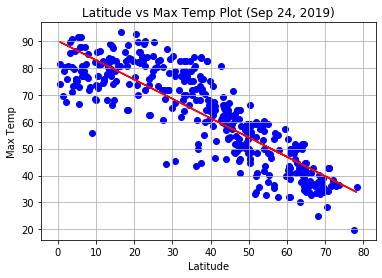

In [127]:
chartfest(north_city_df,"Max Temp")
print()
print("Observations:")
print("Very strong negative relationship between Northern latitude and temperture with an r value of -0.85.")
print("The further you move North from the equator(latitude 0), the colder it will likely be.")

plt.savefig("output_data/north_temp.png")
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.61x +80.57
r=0.68
Observations:
Strong positive relationship between Southern latitude and temperture with an r value of 0.61.
The further you move South from the equator(latitude 0), the colder it will likely be.


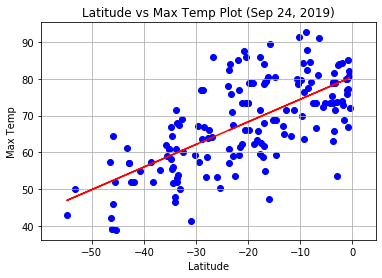

In [128]:
chartfest(south_city_df,"Max Temp")
print("Observations:")
print("Strong positive relationship between Southern latitude and temperture with an r value of 0.61.")
print("The further you move South from the equator(latitude 0), the colder it will likely be.")

plt.savefig("output_data/south_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.06x +70.47
r=0.06
Observations:
The r value of 0.06 implies no significant relationship between latitiude and humidity.


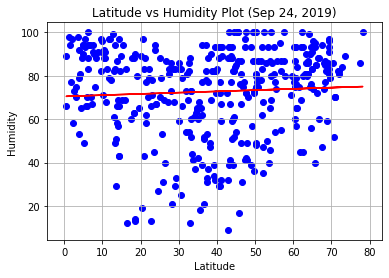

In [129]:
chartfest(north_city_df,"Humidity")
print("Observations:")
print("The r value of 0.06 implies no significant relationship between latitiude and humidity.")
plt.savefig("output_data/north_humid.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.31x +76.2
r=0.2
Observations:
The r value of 0.20 implies a very weak positive relationship between Southern latitiude and humidity.


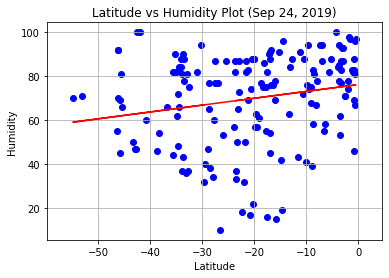

In [130]:
chartfest(south_city_df,"Humidity")
print("Observations:")
print("The r value of 0.20 implies a very weak positive relationship between Southern latitiude and humidity.")
plt.savefig("output_data/south_humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.09x +43.71
r=0.05
Observations:
The r value of 0.05 implies no significant relationship between latitiude and humidity.


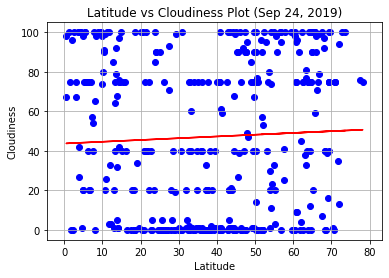

In [131]:
chartfest(north_city_df,"Cloudiness")
print("Observations:")
print("The r value of 0.05 implies no significant relationship between latitiude and humidity.")
plt.savefig("output_data/north_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.23x +45.05
r=0.08
Observations:
The r value of 0.08 implies no significant relationship between latitiude and humidity.


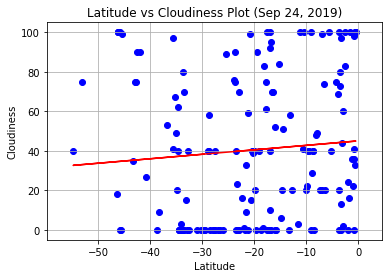

In [132]:
chartfest(south_city_df,"Cloudiness")
print("Observations:")
print("The r value of 0.08 implies no significant relationship between latitiude and humidity.")
plt.savefig("output_data/south_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.06x +5.04
r=0.26
Observations:
The r value of 0.26 implies a very weak positive relationship between Northern latitiude and wind speed.
Wind speeds could be slightly higher as you move North from the equator


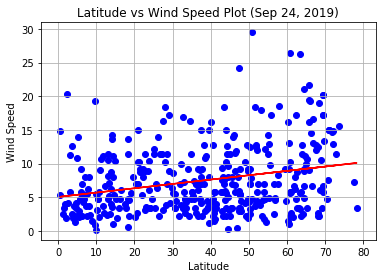

In [133]:
chartfest(north_city_df,"Wind Speed")
print("Observations:")
print("The r value of 0.26 implies a very weak positive relationship between Northern latitiude and wind speed.")
print("Wind speeds could be slightly higher as you move North from the equator")
plt.savefig("output_data/north_wind.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.1x +6.77
r=-0.2
Observations:
The r value of -0.2 implies a very weak negative relationship between Southern latitiude and wind speed.
Wind speeds could be slightly higher as you move South from the equator


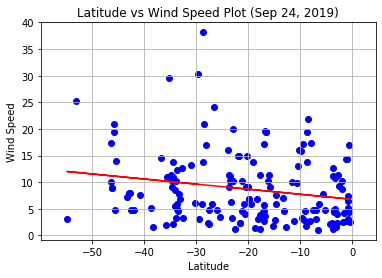

In [134]:
chartfest(south_city_df,"Wind Speed")
print("Observations:")
print("The r value of -0.2 implies a very weak negative relationship between Southern latitiude and wind speed.")
print("Wind speeds could be slightly higher as you move South from the equator")
plt.savefig("output_data/south_wind.png")

In [2]:
print("THREE OBSERVABLE TRENDS")
print("------------------------")
print("1. There is a clear and strong relationship between the abolute value of Latitude and temperature.")
print("The closer the absolute value of Latitude is to zero, the hotter the max temperature.")
print("2. There is a very weak relationship between latitude and wind speed.")
print("The farther you move from the equator, wind speed shows a small tendency to increase.")
print("3. There is no relationship between Latitude and Cloudiness or between Latitude and Humidity")


THREE OBSERVABLE TRENDS
------------------------
1. There is a clear and strong relationship between the abolute value of Latitude and temperature.
The closer the absolute value of Latitude is to zero, the hotter the max temperature.
2. There is a very weak relationship between latitude and wind speed.
The farther you move from the equator, wind speed shows a small tendency to increase.
3. There is no relationship between Latitude and Cloudiness or between Latitude and Humidity
